# Assignment 2
### Understanding Uncertainty
### Harrison Witt

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iowa_liquor_prices = pd.read_csv("../data/iowa.csv")
iowa_liquor_prices.head()

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00


**In my opinion, the most profitable item is the one that makes the most money overall. This is not necessarily the type with the highest profit per unit. I will calculate this by taking 'State Bottle Retail' - 'State Bottle Cost', giving me the profit margin the state earns on each unit sale. Then I will multiply by the number of bottles sold to get total profit per type.**

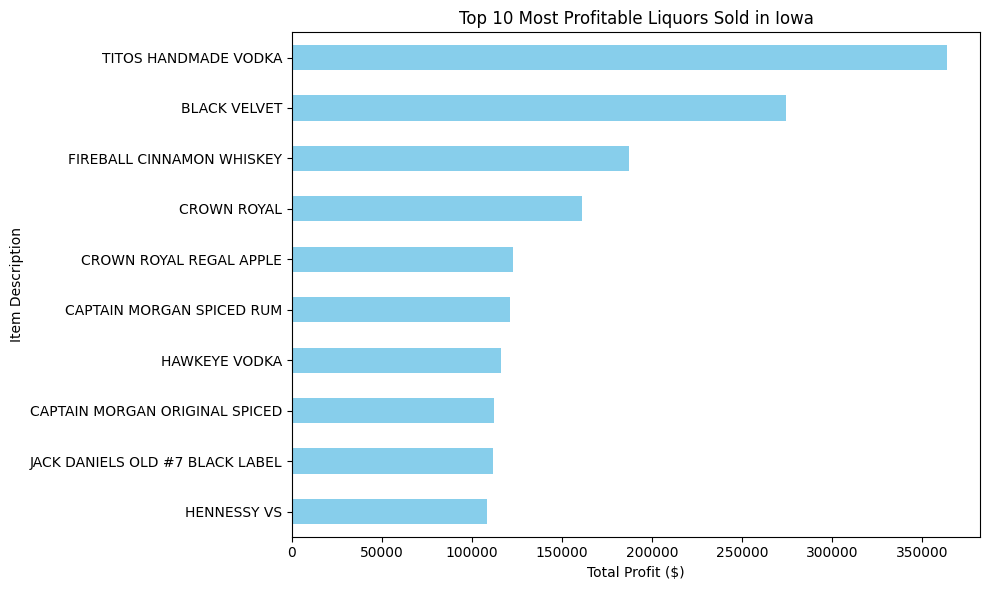

In [2]:
iowa_liquor_prices["Profit per Bottle"] = (
    iowa_liquor_prices["State Bottle Retail"] - iowa_liquor_prices["State Bottle Cost"]
)

# Computing total profit
iowa_liquor_prices["Total Profit"] = (
    iowa_liquor_prices["Profit per Bottle"] * iowa_liquor_prices["Bottles Sold"]
)

# Grouping by Item Description, Summing total Profti
profit_by_item = (
    iowa_liquor_prices.groupby("Item Description")["Total Profit"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Top 10 most profitable liquors
plt.figure(figsize=(10, 6))
profit_by_item.plot(kind="barh", color="skyblue")
plt.title("Top 10 Most Profitable Liquors Sold in Iowa")
plt.xlabel("Total Profit ($)")
plt.gca().invert_yaxis()  # Most profitable at the top
plt.tight_layout()
plt.show()

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [3]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])
print(x)
print(y)

[1 3 5]
[2 5]


In [4]:
z = x - y
print(z)

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

**When I try to subtract y from x I get a ValueError because they are of different shape.**

In [ ]:
z2 = x.reshape(-1, 1) - y.reshape(1, -1)
print(z2)

[[-1 -4]
 [ 1 -2]
 [ 3  0]]


**After reshaping I get the correct result, a matrix of the difference between the two.** 

In [ ]:
z3 = x.reshape(1, -1) - y.reshape(-1, 1)
print(z3)

[[-1  1  3]
 [-4 -2  0]]


**This is an incorrect result, it was broadcasted wrong. The orientation is flipped from a 3x2 to a 2x3.**

**Below is the double for loop**

In [ ]:
# Double for-loop 1
# z2 = x.reshape(-1, 1) - y.reshape(1, -1)
z2_manual = []
for xi in x:
    row = []
    for yj in y:
        row.append(xi - yj)
    z2_manual.append(row)
z2_manual = np.array(z2_manual)
print("z2 (x - y, shape 3x2):\n", z2_manual)

# Double for-loop 2
# z3 = x.reshape(1, -1) - y.reshape(-1, 1)
z3_manual = []
for yi in y:
    row = []
    for xj in x:
        row.append(xj - yi)
    z3_manual.append(row)
z3_manual = np.array(z3_manual)
print("\nz3 (x - y, shape 2x3, flipped):\n", z3_manual)


z2 (x - y, shape 3x2):
 [[-1 -4]
 [ 1 -2]
 [ 3  0]]

z3 (x - y, shape 2x3, flipped):
 [[-1  1  3]
 [-4 -2  0]]


**x.reshape(1, -1) changes the 1D array x into a row vector, so it becomes a 2D array with 1 row and as many columns as there are elements in x. x.reshape(-1, 1) does the oposite and transforms x into a column vector, which is a 2D array with one column and as many rows as elements in x. Both reshaped versions contain the same data but they change the orientation of x, affecting how broadcasting works in operations like subtraction, which is very important in my case bc row and column alignment for both variables determines the final shape of the subtracted result.**

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

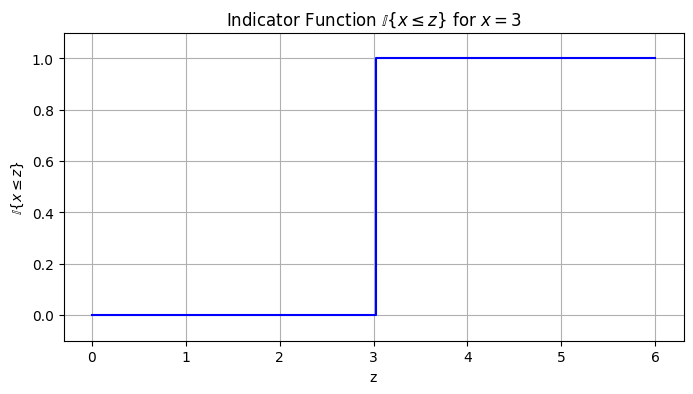

In [ ]:
# Plotting the indicator fn for any z when x = 3

x = 3

# any z values within reason
z_values = np.linspace(0, 6, 100)

# Indicator fn
indicator_values = (x <= z_values).astype(int)

# Plot instructions
plt.figure(figsize=(8, 4))
plt.plot(z_values, indicator_values, drawstyle="steps-post", color='blue')
plt.title(r"Indicator Function $\mathbb{I}\{x \leq z\}$ for $x=3$")
plt.xlabel("z")
plt.ylabel(r"$\mathbb{I}\{x \leq z\}$")
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.show()


**Explaining how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$:**

**The expression $ 1- \mathbb{I}\{ x \le z \} $ is equivalent to $ \mathbb{I}\{ x > z \}$ because the indicator function can only take values 0 or 1. If x is less than or equal to z, then $ \mathbb{I}\{ x \le z \}  = 1\ $, so $ 1- \mathbb{I}\{ x \le z \} = 0\ $, which is the same as $ \mathbb{I}\{ x > z \} = 0\ $. The opposite argument is true as well, if x is greater than z, then $ \mathbb{I}\{ x \le z \}  = 0\ $, and $ 1- \mathbb{I}\{ x \le z \} = 1\ $, which is the same as $ \mathbb{I}\{ x > z \} = 1\ $. In short, subtracting the indicator from 1 simply flips its output and captures the complementary situation.**


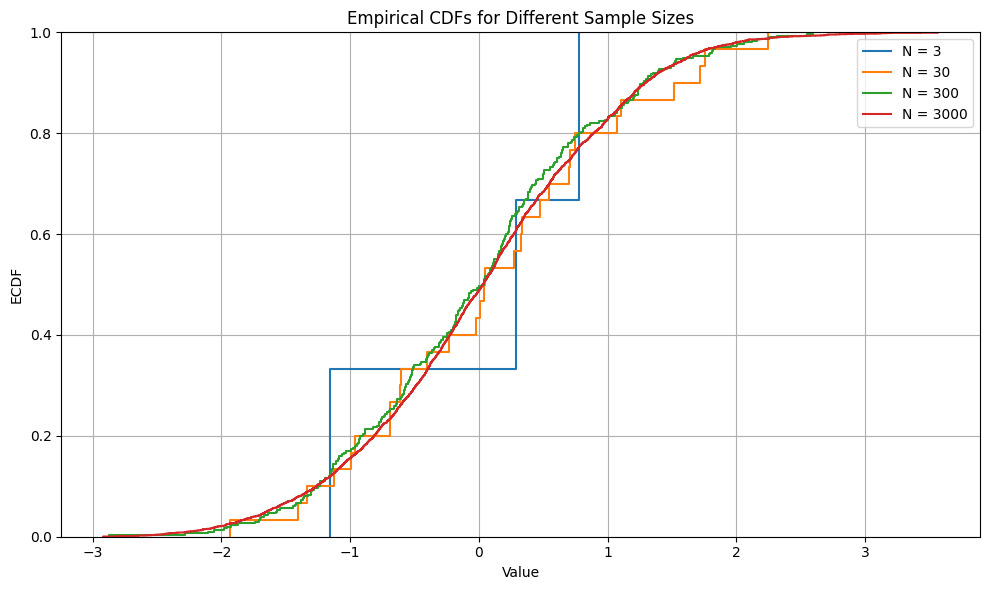

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:

    sns.ecdfplot(X, label=f"N = {N}")

plt.title("Empirical CDFs for Different Sample Sizes")
plt.xlabel("Value")
plt.ylabel("ECDF")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**What happens to the ECDF qualitatively as the sample size $N$ increases?: It gets smoothed out. What I mean by this is that as the sample size \(N\) increases, the ECDF more closely resembles the true cdf of the underlying data distribution. With a small \(N\), the ECDF acts like a step-function, but as \(N\) grows, randomness and sampling variablility is reduced.**

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [5]:
# Fn that computes any quantile w/o np.quantile
def my_quantile(series, q):
    data_sorted = sorted(series.dropna())
    n = len(data_sorted)
    pos = q * (n - 1)
    lower = int(pos)
    upper = lower + 1
    if upper >= n:
        return data_sorted[lower]
    return data_sorted[lower] + (pos - lower) * (data_sorted[upper] - data_sorted[lower])

In [6]:
# Fn for IQR and whiskers
def iqr_and_whiskers(series):
    q1 = my_quantile(series, 0.25)
    q3 = my_quantile(series, 0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    return {"IQR": iqr, "Lower Whisker": lower_whisker, "Upper Whisker": upper_whisker}

In [7]:
# Fn for 5-number summary and boxplot values
def five_number_summary(series):
    return {
        "Min": series.min(),
        "Q1": my_quantile(series, 0.25),
        "Median": my_quantile(series, 0.5),
        "Q3": my_quantile(series, 0.75),
        "Max": series.max()
    }

In [8]:
# Fn for outlier identification
def identify_outliers(series):
    whiskers = iqr_and_whiskers(series)
    lower, upper = whiskers["Lower Whisker"], whiskers["Upper Whisker"]
    return series.apply(lambda x: x < lower or x > upper)

In [11]:
# Applying fns from above for a numeric var in iowa_liquor_prices
col = iowa_liquor_prices["Sale (Dollars)"]

print("Five number summary:", five_number_summary(col))
print("IQR & whiskers:", iqr_and_whiskers(col))
print("Outliers (True = outlier):")
print(identify_outliers(col).head(5))  # preview first 5

Five number summary: {'Min': np.float64(-1628.4), 'Q1': 36.550000000000004, 'Median': 78.66, 'Q3': 152.88, 'Max': np.float64(36720.0)}
IQR & whiskers: {'IQR': 116.32999999999998, 'Lower Whisker': -137.94499999999996, 'Upper Whisker': 327.375}
Outliers (True = outlier):
0    False
1    False
2    False
3    False
4    False
Name: Sale (Dollars), dtype: bool


Note that they are all false above bc the lower whisker is negative

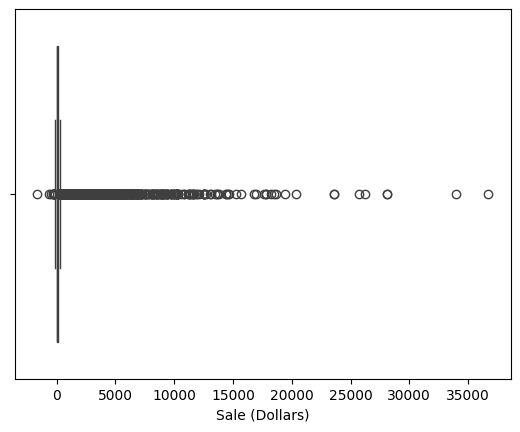

count    159904.000000
mean        146.931598
std         459.368723
min       -1628.400000
25%          36.550000
50%          78.660000
75%         152.880000
max       36720.000000
Name: Sale (Dollars), dtype: float64


In [13]:
# Comparing my answers with sns.boxplot and df.describe
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=iowa_liquor_prices["Sale (Dollars)"])
plt.show()

print(iowa_liquor_prices["Sale (Dollars)"].describe())

**Written answer of above:**

**The boxplot of "Sale (Dollars)" from the dataset shows a highly skewed distribution. Most sales transactions are concentrated at low values, with the bulk of the data falling between $0 and $500, and the median is just under $200. The IQR is fairly narrow compared to the data, showing that half of the sales are clustered within a small range of lower values. However, the dataset contains a long right tail with lots of much larger transactions that go far beyond the upper whisker (which is $327), so they are shown as outliers on the plot. These outliers go as high as $36,700, which skew the distribution.**